In [17]:
import numpy as np
import torch
import os
import h5py
import pickle
import fnmatch
import cv2
import sys
from time import time
from torch.utils.data import TensorDataset, DataLoader
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)


In [2]:
act_path = "/home/zfei/code/act-plus-plus/"
sys.path.append(act_path)
from utils import EpisodicDataset
from utils import find_all_hdf5, flatten_list, get_norm_stats

%load_ext autoreload
%autoreload 2

In [3]:
dataset_path_list = find_all_hdf5("/mnt/data1/act/train_act_scara_sim-env-block-pick/", skip_mirrored_data=False)
norm_stats, all_episode_len = get_norm_stats(dataset_path_list)

camera_names = ['wrist', 'wrist_down', 'top']
train_episode_ids = [0, 1]
train_episode_len = [all_episode_len[i] for i in train_episode_ids]

chunk_size = 64
policy_class = "EPACT"

Found 511 hdf5 files


In [6]:
train_dataset = EpisodicDataset(dataset_path_list, 
                                camera_names, 
                                norm_stats, 
                                train_episode_ids, 
                                train_episode_len, 
                                chunk_size, 
                                policy_class)


URDF Path:  /home/zfei/code/act-plus-plus/urdf/hitbot_model.urdf
kdl_parse urdf ok?:  True
augment_images:  False
Initializing transformations


In [27]:
image_data, qpos_data, action_data, is_pad, end_pose_data = train_dataset[100]

In [28]:
image = image_data.numpy()
image_front = image[0].transpose(1, 2, 0)
image_front = cv2.cvtColor(image_front, cv2.COLOR_BGR2RGB)
image_front.shape

(480, 640, 3)

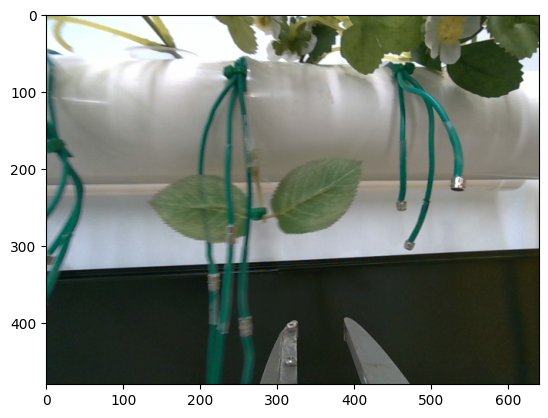

In [31]:
plt.imshow(image_front)

In [30]:
cv2.imwrite("image_front.png", image_front)

True